In [42]:
import os
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.append("../../")

import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

import anndata
from scipy.stats import spearmanr, pearsonr
import numpy as np
from PIL import Image
import matplotlib

from digitalhistopathology.benchmark.benchmark_clustering import BenchmarkClustering

# Load configuration
with open("../../config/config_notebooks.json", "r") as config_file:
    config = json.load(config_file)

Image.MAX_IMAGE_PIXELS = None
matplotlib.rcParams["pdf.fonttype"] = 42
matplotlib.rcParams["ps.fonttype"] = 42

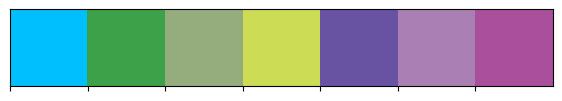

In [43]:
a = config["retrained_color_palette"]
sns.palplot(sns.color_palette(a))

In [44]:
extension='pdf'



In [45]:
# This will give you the results for the FULL models.

model_type = config["retrained_model_list2_type"]
model_list = config["retrained_model_list2"]
benchmark_folder = config["retrained_benchmark_folder2"]
path_to_pipeline=config['path_to_retrained_pipelines_2']


# UNCOMMENT TO GENERATE THE RESULTS FOR THE EXPLORA MODELS
# model_type = config["retrained_model_list1_type"]
# model_list = config["retrained_model_list1"]
# benchmark_folder = config["retrained_benchmark_folder1"]
# path_to_pipeline=config['path_to_retrained_pipelines_1']


pairs_to_compare = [("uni", model) for model in model_list if model != "uni"]

models_palette = dict(zip(model_list, a))
models_palette["handcrafted_features"] = "lightgrey"


In [46]:

saving_folder=os.path.join(benchmark_folder, "unsupervised_clustering_ARI", "kmeans")

benchmark_clustering = BenchmarkClustering(path_to_pipeline=path_to_pipeline,
                                           pipelines_list=model_list,
                                           results_folder="../results",
                                           saving_folder=saving_folder,
                                           dataset=config['dataset'],
                                           extension=extension
                                           )

['uni', 'uni_full_kde_4096_prototypes', 'uni_full_kde_16384_prototypes', 'uni_full_kde_65536_prototypes', 'uni_full_koleo_4096_prototypes', 'uni_full_koleo_16384_prototypes', 'uni_full_koleo_65536_prototypes']
<class 'list'>
Label files: []


In [47]:
def plot_ari_scores_all_patients(clustering_dict, model_list=None):

    if model_list is None:
        model_list = clustering_dict.keys()

    ari_scores = {}
    for model in model_list:
        ari_scores[model] = {}
        for patient in clustering_dict[model].keys():
            if (patient != 'all') and (patient != 'mean'):
                ari_scores[model][patient] = clustering_dict[model][patient]['ari']
    df_aris = pd.DataFrame.from_dict(ari_scores)
    df_aris_melted = pd.melt(df_aris, var_name='model', value_name='ari')
    df_aris_melted['patient'] = df_aris.index.to_list()*len(df_aris.columns)

    sns.boxplot(data=df_aris_melted, x='model', y='ari', color='white', linewidth=2)
    sns.stripplot(data=df_aris_melted, x='model', y='ari', jitter=True, dodge=True, linewidth=1, hue='patient', palette='Accent')
    plt.xticks(rotation=90)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    sns.despine()
    plt.title('ARI scores for unsupervised clustering', weight='bold')

## Comparison between linear and unlinear clustering

In [48]:
try:
    with open(os.path.join(benchmark_folder, 'unsupervised_clustering_ARI', 'kmeans', 'unsupervised_clustering_results_optk.json')) as f:
        raw_clust = json.load(f)
except:
    raw_clust = benchmark_clustering.unsupervised_clustering_benchmark(n_clusters=None, clustering_name='raw')

try:
    with open(os.path.join(benchmark_folder, 'unsupervised_clustering_ARI', 'kmeans',  'svd5_multiplied_by_S_unsupervised_clustering_results_optk.json')) as f:
        svd_clust = json.load(f)
except:
    svd_clust = benchmark_clustering.unsupervised_clustering_benchmark(n_clusters=None, clustering_name='svd5')
    

try:
    with open(os.path.join(benchmark_folder, 'unsupervised_clustering_ARI', 'kmeans', 'best_umap_ari_per_slide.json')) as f:
        umap_clust = json.load(f)
except:
    umap_clust = benchmark_clustering.get_best_UMAP_ari_per_slide(force_loading=True)


In [49]:
umap_clust

{'uni': {'B1': {'ari': 0.41575507360857394,
   'params': {'n_neighbors': 10, 'min_dist': 0.001, 'n_components': 2}},
  'C1': {'ari': 0.18328671007228756,
   'params': {'n_neighbors': 30, 'min_dist': 0.001, 'n_components': 2}},
  'D1': {'ari': 0.29479432133878974,
   'params': {'n_neighbors': 300, 'min_dist': 0.001, 'n_components': 2}},
  'E1': {'ari': 0.3498411590169387,
   'params': {'n_neighbors': 10, 'min_dist': 0.1, 'n_components': 2}},
  'F1': {'ari': 0.10734288748525796,
   'params': {'n_neighbors': 200, 'min_dist': 0.001, 'n_components': 2}},
  'G2': {'ari': 0.28416330422425307,
   'params': {'n_neighbors': 100, 'min_dist': 0.001, 'n_components': 2}},
  'H1': {'ari': 0.3854857063617265,
   'params': {'n_neighbors': 30, 'min_dist': 0.1, 'n_components': 2}}},
 'uni_full_kde_4096_prototypes': {'B1': {'ari': 0.24999587997779435,
   'params': {'n_neighbors': 100, 'min_dist': 0.001, 'n_components': 2}},
  'C1': {'ari': 0.039281278666149735,
   'params': {'n_neighbors': 150, 'min_dist'

In [50]:
for model in raw_clust.keys():
    print(f"Model: {model}: ari all: {raw_clust[model]['all']['ari']}, ari mean: {raw_clust[model]['mean']['ari']}")

Model: uni: ari all: 0.1405392782347744, ari mean: 0.2351268295263375
Model: uni_full_kde_4096_prototypes: ari all: 0.22435893962084028, ari mean: 0.19504631252412255
Model: uni_full_kde_16384_prototypes: ari all: 0.13403037034764706, ari mean: 0.19007796709910665
Model: uni_full_kde_65536_prototypes: ari all: 0.1009119945294695, ari mean: 0.16615053296027052
Model: uni_full_koleo_4096_prototypes: ari all: 0.246959512048176, ari mean: 0.1894203703846208
Model: uni_full_koleo_16384_prototypes: ari all: 0.1801047519580902, ari mean: 0.21054692645132875
Model: uni_full_koleo_65536_prototypes: ari all: 0.13071168730250624, ari mean: 0.18392541734273457
Model: handcrafted_features: ari all: 0.10094446204343024, ari mean: 0.11174721697791898


In [51]:
for model in raw_clust.keys():
    print(f"Model: {model}: ari tumor: {raw_clust[model]['ARI_tumor']}")

Model: uni: ari tumor: 0.14775572194802
Model: uni_full_kde_4096_prototypes: ari tumor: 0.18365074945187695
Model: uni_full_kde_16384_prototypes: ari tumor: 0.1890790502135067
Model: uni_full_kde_65536_prototypes: ari tumor: 0.1420053083676916
Model: uni_full_koleo_4096_prototypes: ari tumor: 0.17858172906558764
Model: uni_full_koleo_16384_prototypes: ari tumor: 0.18101867889344025
Model: uni_full_koleo_65536_prototypes: ari tumor: 0.13898538339225633
Model: handcrafted_features: ari tumor: 0.08584559722543653


In [52]:
umap_clust.keys()

dict_keys(['uni', 'uni_full_kde_4096_prototypes', 'uni_full_kde_16384_prototypes', 'uni_full_kde_65536_prototypes', 'uni_full_koleo_4096_prototypes', 'uni_full_koleo_16384_prototypes', 'uni_full_koleo_65536_prototypes', 'handcrafted_features'])

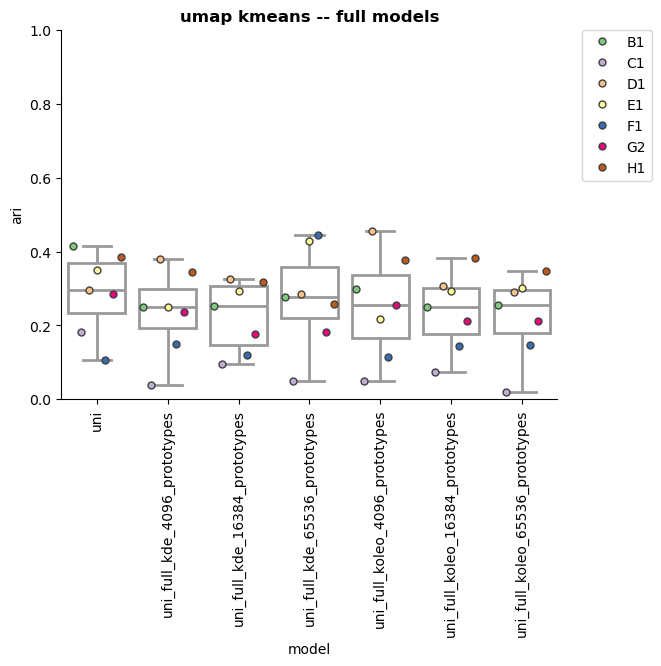

In [53]:
# for clust_dict, clust_name in zip([raw_clust, svd_clust, umap_clust], ["raw", "svd", "umap"]):

plt.figure()
plot_ari_scores_all_patients(umap_clust, model_list=model_list)
plt.ylim(0, 1)
plt.title(f"umap kmeans -- {model_type} models", weight='bold')

if len(umap_clust[model_list[0]].keys()) > 15:
    plt.legend().remove()


In [54]:
# Scatter plot

In [55]:
dfs_clust = []
for clustering_dict, method in zip([raw_clust, svd_clust, umap_clust], ["raw", "svd", "umap"]):
#for clustering_dict, method in zip([umap_clust], ["umap"]):
    ari_scores = {}
    for model in clustering_dict.keys():
        ari_scores[model] = {}
        for patient in clustering_dict[model].keys():
            #if (patient != 'all') and (patient != 'mean'):
            if (patient != 'ARI_tumor'):
                ari_scores[model][patient] = clustering_dict[model][patient]['ari']
    df_aris = pd.DataFrame.from_dict(ari_scores)
    df_aris_melted = pd.melt(df_aris, var_name='model', value_name='ari')
    df_aris_melted['patient'] = df_aris.index.to_list()*len(df_aris.columns)
    df_aris_melted['clustering'] = method
    dfs_clust.append(df_aris_melted)

df_comp = pd.concat(dfs_clust)




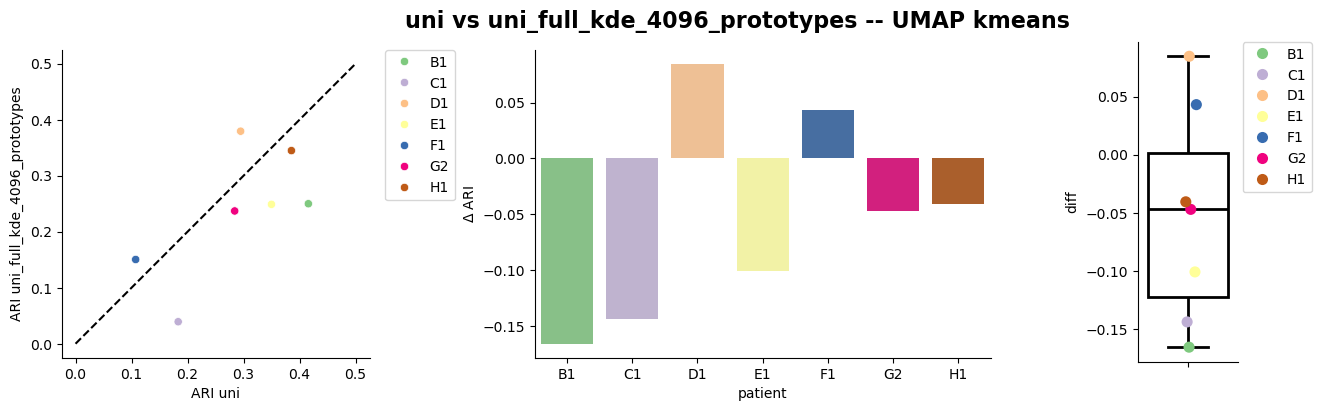

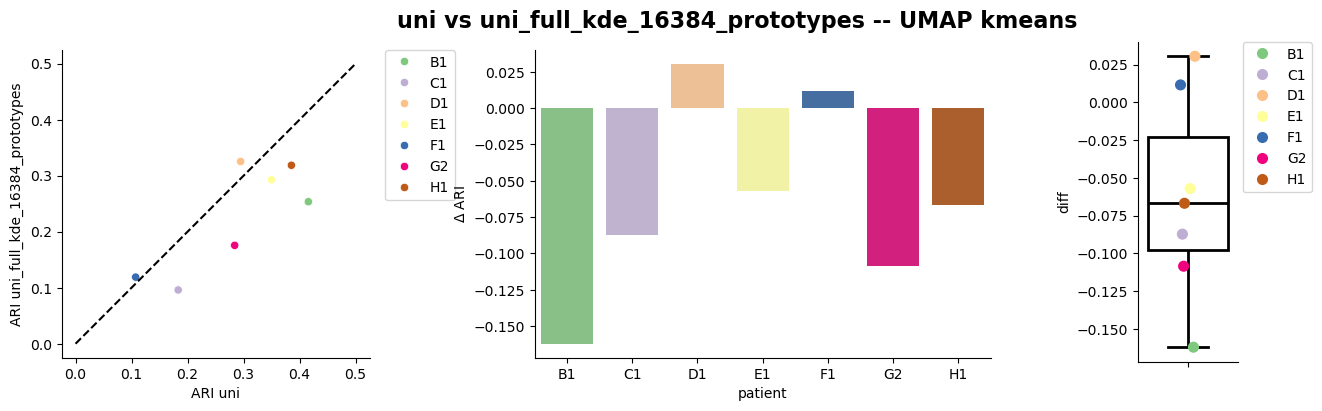

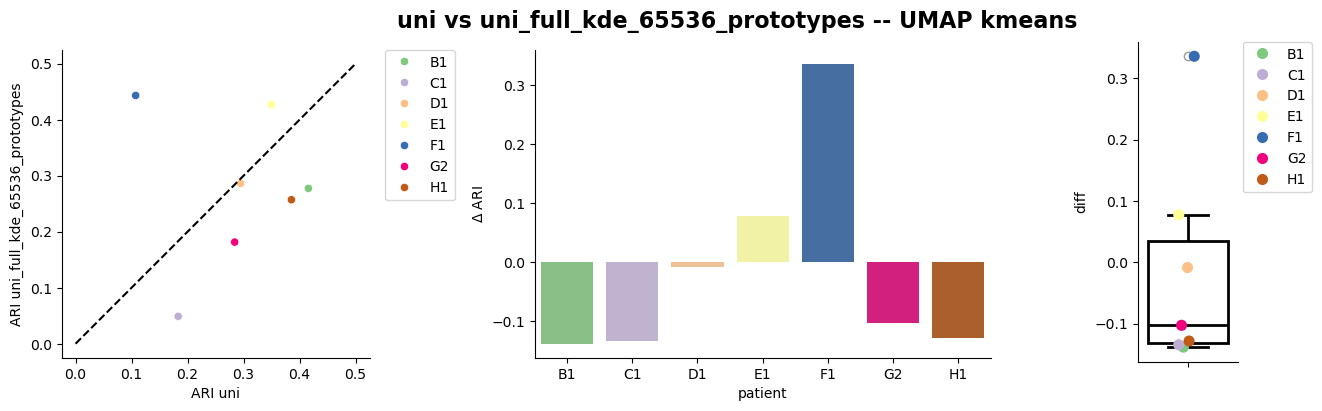

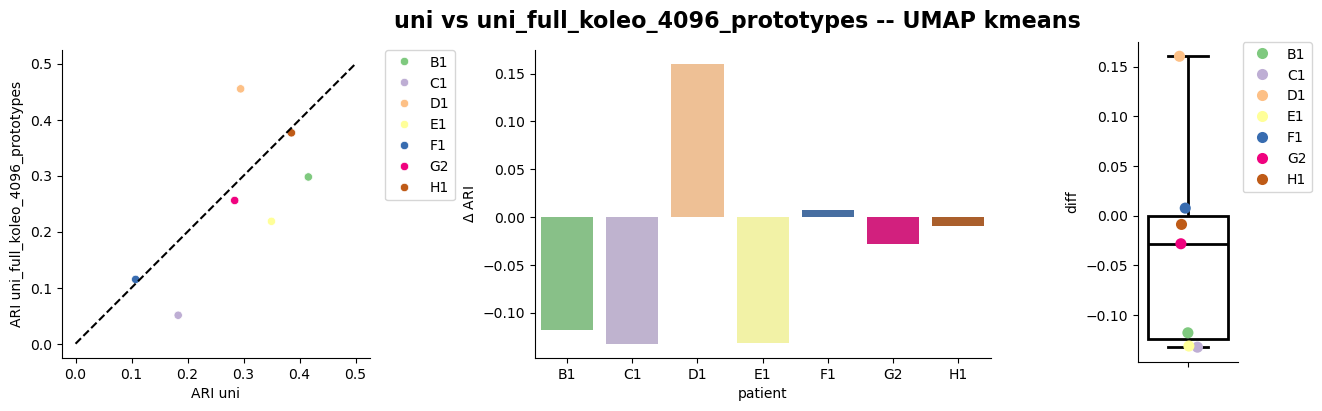

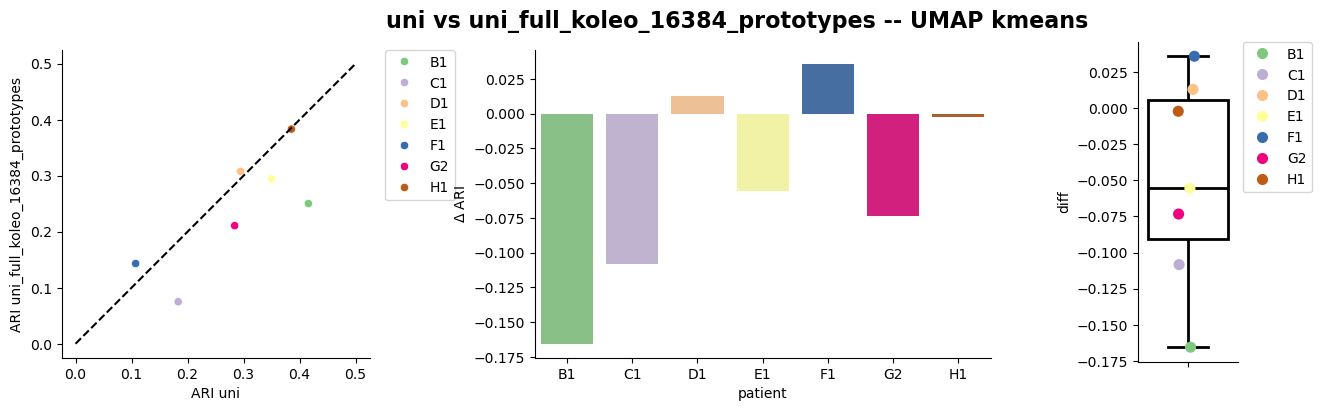

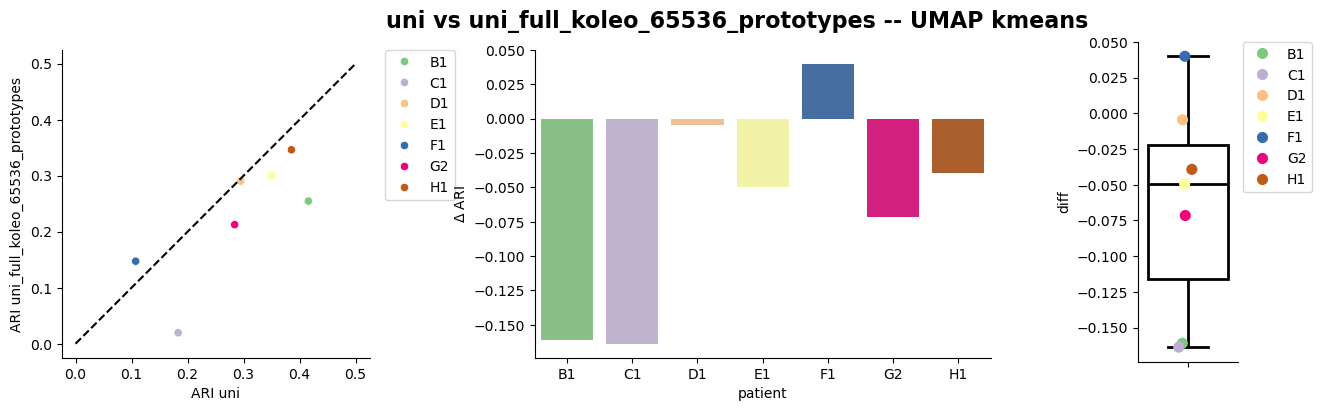

In [56]:
df_comps = {}
for clust_type in ['umap']:
  df_comps[clust_type] = {}
  for pair in pairs_to_compare:
    
    plt.figure(figsize=(20, 4))
    plt.subplot(1, 3, 1)

    df_sub_comp = df_comp[(df_comp['model'] == pair[1]) 
                            & (df_comp['clustering'] == clust_type) 
                            & (df_comp['patient'] != 'mean') 
                            & (df_comp['patient'] != 'all')].merge(df_comp[(df_comp['model'] == pair[0]) 
                                                                        & (df_comp['clustering'] == clust_type) 
                                                                        & (df_comp['patient'] != 'mean') 
                                                                        & (df_comp['patient'] != 'all')], 
                                                                        left_on='patient',
                                                                            right_on='patient', 
                                                                            suffixes=(f'_{pair[1]}', f'_{pair[0]}'))
    
    df_comps[clust_type][f"{pair[1]}"] = df_sub_comp
    
    plt.gca().set_aspect('equal', adjustable='box')
    sns.scatterplot(data=df_sub_comp, x=f'ari_{pair[0]}', y=f'ari_{pair[1]}', hue='patient', palette='Accent')
    plt.plot([0, 0.5], [0, 0.5], color='black', linestyle='--')
    if len(df_sub_comp['patient'].unique()) > 15:
      plt.legend().remove()
    else:
      plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    # plt.title(f'{pair[0]} vs {pair[1]}', weight='bold')
    plt.xlabel(f'ARI {pair[0]}')
    plt.ylabel(f'ARI {pair[1]}')
    sns.despine()

    plt.subplot(1, 3, 2)
    df_sub_comp['diff'] = df_sub_comp[f'ari_{pair[1]}'] - df_sub_comp[f'ari_{pair[0]}']
    sns.barplot(x='patient', y='diff', data=df_sub_comp, palette='Accent', hue='patient') 
    sns.despine()
    plt.ylabel(r'$\Delta$ ARI')
    # plt.title(f'Difference in ARI {pair[1]} - {pair[0]}', weight='bold')

    plt.subplot(1, 3, 3)
    plt.gca().set_position([0.7, 0.1, 0.05, 0.8])
    sns.boxplot(data=df_sub_comp, y='diff', color='white', linewidth=2,  boxprops=dict(facecolor='white', edgecolor='black'),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'),
            medianprops=dict(color='black'))
    sns.stripplot(data=df_sub_comp, y='diff', hue='patient', palette='Accent', linewidth=0, size=8)
    
    if len(df_sub_comp['patient'].unique()) > 15:
      plt.legend().remove()
    else:
      plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    sns.despine()

    plt.suptitle(f'{pair[0]} vs {pair[1]} -- {clust_type.upper()} kmeans', weight='bold', fontsize=16)
    plt.savefig(os.path.join(config["figures_folder"], f"Figure3/{pair[0]}_vs_{pair[1]}_{clust_type}_kmeans.pdf"), bbox_inches='tight')

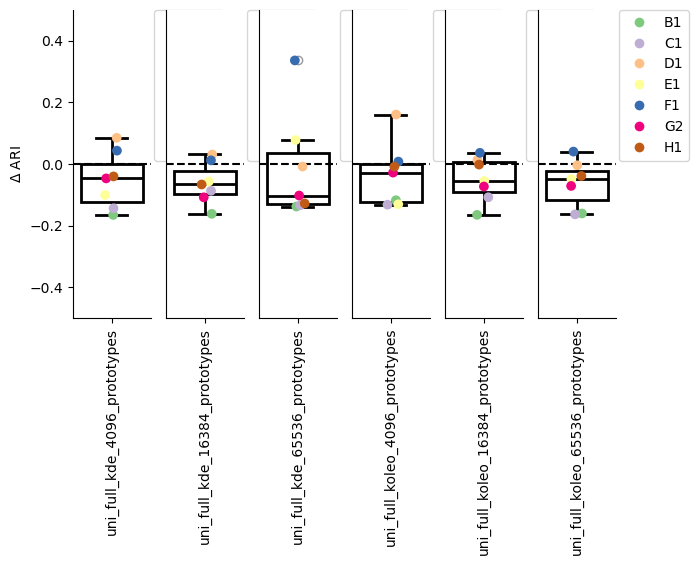

In [57]:
plt.figure(figsize=(7, 4))

df_comps = {}
for clust_type in ['umap']:
  df_comps[clust_type] = {}
  for i, pair in enumerate(pairs_to_compare):
    
    plt.subplot(1, len(pairs_to_compare), i+1)

    df_sub_comp = df_comp[(df_comp['model'] == pair[1]) 
                            & (df_comp['clustering'] == clust_type) 
                            & (df_comp['patient'] != 'mean') 
                            & (df_comp['patient'] != 'all')].merge(df_comp[(df_comp['model'] == pair[0]) 
                                                                        & (df_comp['clustering'] == clust_type) 
                                                                        & (df_comp['patient'] != 'mean') 
                                                                        & (df_comp['patient'] != 'all')], 
                                                                        left_on='patient',
                                                                            right_on='patient', 
                                                                            suffixes=(f'_{pair[1]}', f'_{pair[0]}'))
    
    df_comps[clust_type][f"{pair[1]}"] = df_sub_comp
    


    df_sub_comp['diff'] = df_sub_comp[f'ari_{pair[1]}'] - df_sub_comp[f'ari_{pair[0]}']

    #plt.gca().set_position([0.7, 0.1, 0.05, 0.8])
    sns.boxplot(data=df_sub_comp, y='diff', color='white', linewidth=2,  boxprops=dict(facecolor='white', edgecolor='black'),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'),
            medianprops=dict(color='black'))
    sns.stripplot(data=df_sub_comp, y='diff', hue='patient', palette='Accent', linewidth=0, size=7)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    sns.despine()
    plt.xticks(ticks=[0], labels=[pair[1]], rotation=90)
    plt.ylim(-0.5, 0.5)
    
    plt.axhline(0, color='black', linestyle='--')
    plt.ylabel(r'$\Delta$ ARI')
    if i != 0:

        plt.gca().axes.get_yaxis().set_visible(False)
    
    if i != len(pairs_to_compare) -1:
        plt.legend().remove()
        
    if len(df_sub_comp['patient'].unique()) > 15:
      plt.legend().remove()
    else:
      plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        

plt.savefig(os.path.join(config["figures_folder"], f"Figure2/boxplot_ARI_differences_per_patient_{clust_type}_kmeans_{model_type}_models.pdf"), bbox_inches='tight')


(0.0, 0.55)

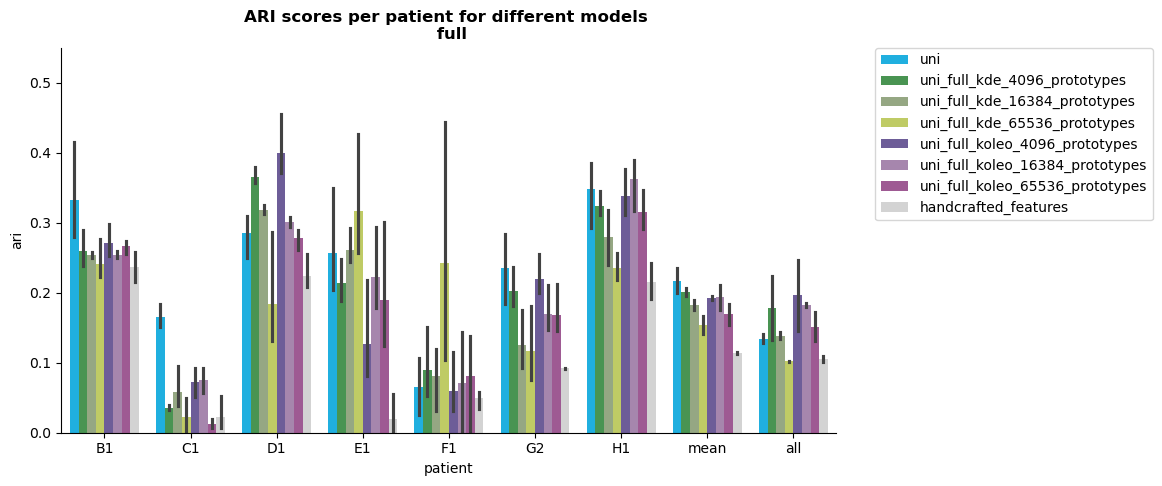

In [58]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df_comp, x='patient', y='ari', hue='model', palette=models_palette)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()
plt.title(f'ARI scores per patient for different models \n {model_type}', weight='bold')
plt.ylim(0, 0.55)

In [59]:
import math
def make_spider(df, row, color, title):
    
    categories=list(df)[0:]
    N = len(categories)

    
    angles = [n / float(N) * 2 * math.pi for n in range(N)]
    angles += angles[:1]
     
    plt.rc('figure', figsize=(5, 5))
 
    ax = plt.subplot(1,1,1, polar=True)
 
    ax.set_theta_offset(math.pi / 2)
    ax.set_theta_direction(-1)
    
 
   
    plt.xticks(angles[:-1], categories, color='black', size=12)
    ax.tick_params(axis='x', rotation=5.5)
    
    ax.set_rlabel_position(0)
    plt.yticks([0.1,0.2,0.3,0.4], ["0.1","0.2","0.3","0.4"], color="black", size=10)
    plt.ylim(0,0.55)
 
    
    values=df.reset_index().loc[row].values.tolist()[1:]
    values += values[:1]
    ax.plot(angles, values, color = color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color = color, alpha = 0.1)
 
  
    plt.title(title, fontsize=20, x = 0.5, y = 1.1)

In [60]:
df_comp_patient = df_comp[~(df_comp["patient"].isin(["mean", "all"]))]


In [61]:
df_comp[df_comp['clustering'] == 'raw'][['model', 'ari']].groupby('model').mean()

,ari
model,
handcrafted_features,0.110547
uni,0.224617
uni_full_kde_16384_prototypes,0.183850
uni_full_kde_4096_prototypes,0.198303
uni_full_kde_65536_prototypes,0.158902
uni_full_koleo_16384_prototypes,0.207164
uni_full_koleo_4096_prototypes,0.195814
uni_full_koleo_65536_prototypes,0.178013


In [62]:
df_comp[df_comp['clustering'] == 'raw'][['model', 'ari']].groupby('model').std()

,ari
model,
handcrafted_features,0.087322
uni,0.094085
uni_full_kde_16384_prototypes,0.094171
uni_full_kde_4096_prototypes,0.106414
uni_full_kde_65536_prototypes,0.075103
uni_full_koleo_16384_prototypes,0.097864
uni_full_koleo_4096_prototypes,0.114921
uni_full_koleo_65536_prototypes,0.095711


In [63]:

for value in df_comp[df_comp['clustering'] == 'umap'][['model', 'ari']].groupby('model').std().loc[model_list, 'ari']:
    print(f"{value:.2f}")


0.11
0.11
0.10
0.14
0.14
0.10
0.11


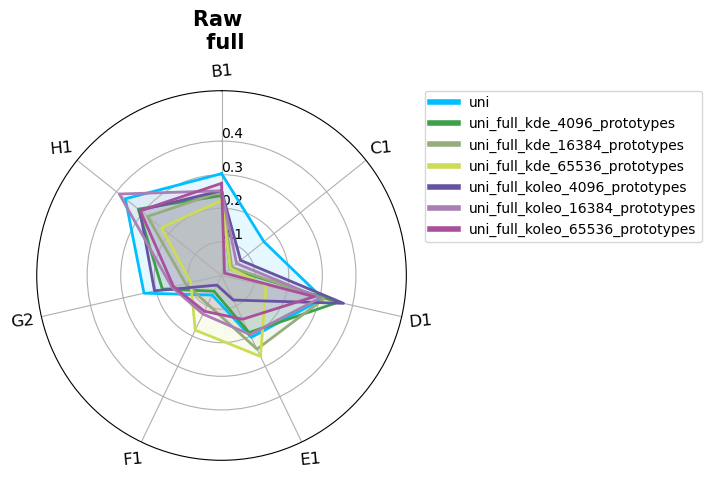

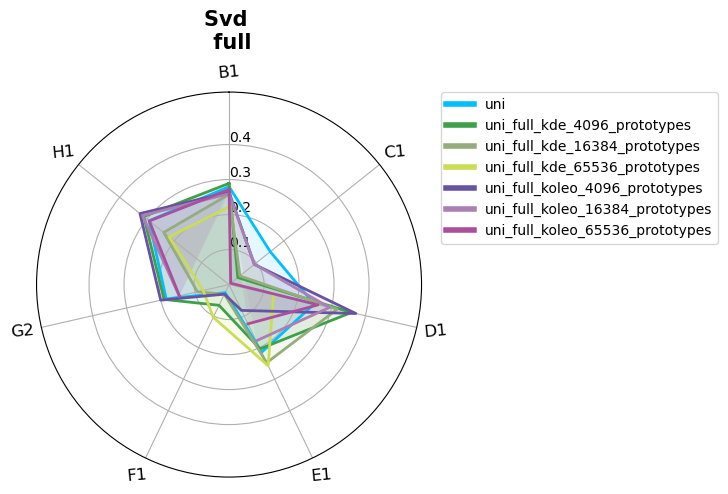

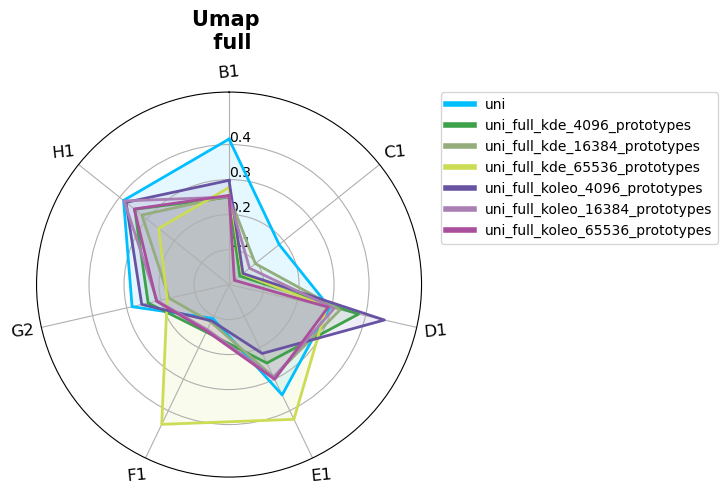

In [64]:
for clustering_technique in ['raw', 'svd', 'umap']:
    plt.figure()
    for i, model in enumerate(model_list):
        d_test = df_comp_patient[(df_comp_patient["model"] == model) & (df_comp_patient["clustering"] == clustering_technique)].T
        d_test.columns = d_test.loc['patient'].values
        make_spider(d_test, row=1, color=models_palette[model], title=model)
        plt.title(f"{clustering_technique.capitalize()} \n {model_type}", weight='bold', y=1.09, fontsize=15)

    handles = [plt.Line2D([0], [0], color=models_palette[model], lw=4) for model in model_list]
    plt.legend(handles, model_list, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    plt.savefig(os.path.join(config["figures_folder"], f"Figure3/ari_scores_radar_plot_{clustering_technique}_{model_type}_models.pdf"), bbox_inches='tight')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


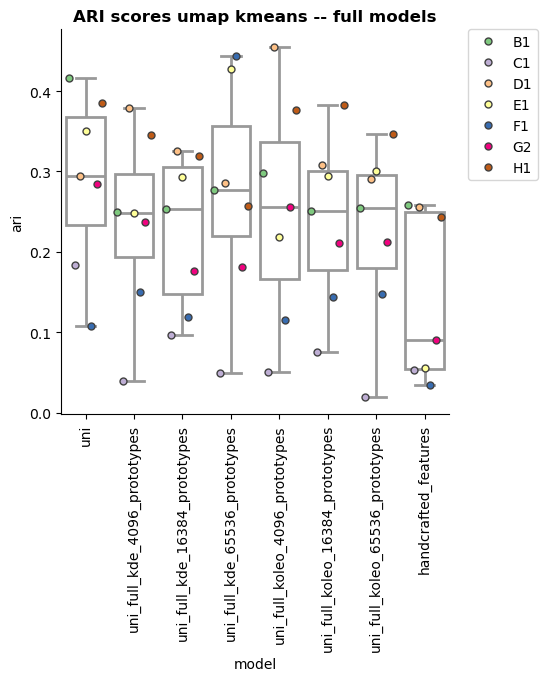

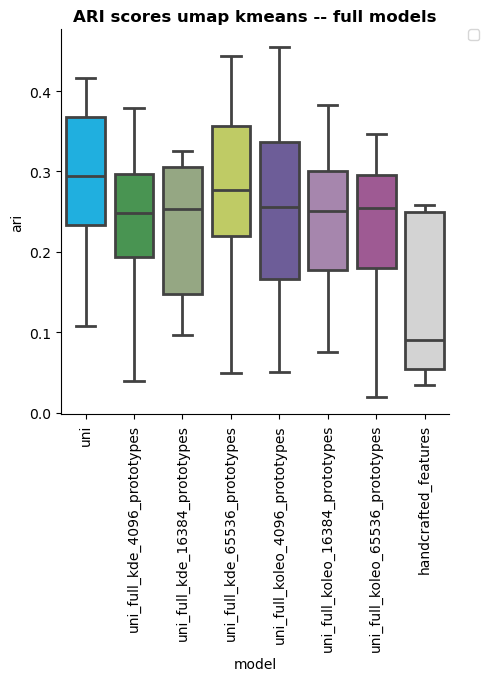

In [65]:
## 
sns.boxplot(data=df_comp_patient[df_comp_patient['clustering'] == 'umap'], x='model', y='ari', color='white', linewidth=2)
sns.stripplot(data=df_comp_patient[df_comp_patient['clustering'] == 'umap'], x='model', y='ari', jitter=True, dodge=True, linewidth=1, hue='patient', palette='Accent')
plt.xticks(rotation=90)
sns.despine()
plt.title('ARI scores for unsupervised clustering', weight='bold')
sns.despine()
plt.title(f"ARI scores umap kmeans -- {model_type} models", weight='bold')

if len(df_comp_patient['patient'].unique()) > 15:
    plt.legend().remove()
else:
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig(os.path.join(config["figures_folder"], f"Figure2/ari_scores_umap_kmeans_{model_type}_models_with_patient.pdf"), bbox_inches='tight')

## 
plt.figure()
sns.boxplot(data=df_comp_patient[df_comp_patient['clustering'] == 'umap'], 
            x='model', y='ari', hue='model', linewidth=2, palette=models_palette)
plt.xticks(rotation=90)
sns.despine()
plt.title('ARI scores for unsupervised clustering', weight='bold')
sns.despine()
plt.title(f"ARI scores umap kmeans -- {model_type} models", weight='bold')


if len(df_comp_patient['patient'].unique()) > 15:
    plt.legend().remove()
else:
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig(os.path.join(config["figures_folder"], f"Figure3/ari_scores_umap_kmeans_{model_type}_models_colors.pdf"), bbox_inches='tight')

In [66]:

for i, model in enumerate(df_comp['model'].unique()):
    print(model)
    sub_df = df_comp[(df_comp['model'] == model) & (df_comp['clustering'] == 'umap')][['ari', 'patient']].rename(columns = {'ari': model})
    # dfs.append(sub_df)
    if i > 0:
        df = df.merge(sub_df, on='patient')
    else:
        df = sub_df.copy()

df.set_index('patient', inplace=True)
df_delta_ari = df.apply(lambda x: x - df['uni'])
df_delta_ari.drop('uni', axis=1, inplace=True) 

uni
uni_full_kde_4096_prototypes
uni_full_kde_16384_prototypes
uni_full_kde_65536_prototypes
uni_full_koleo_4096_prototypes
uni_full_koleo_16384_prototypes
uni_full_koleo_65536_prototypes
handcrafted_features


(-0.8, 0.8)

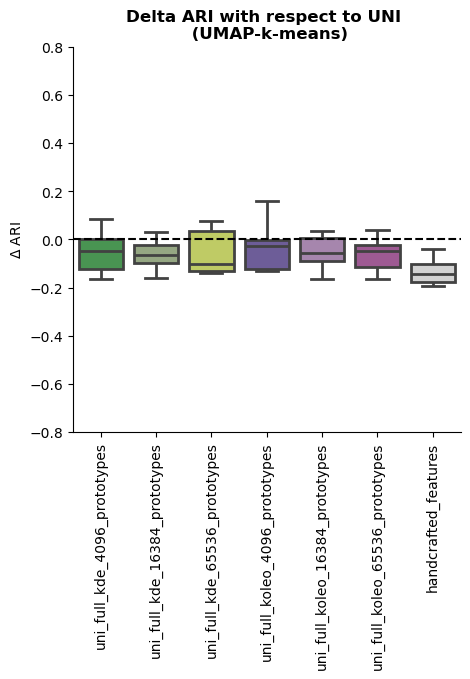

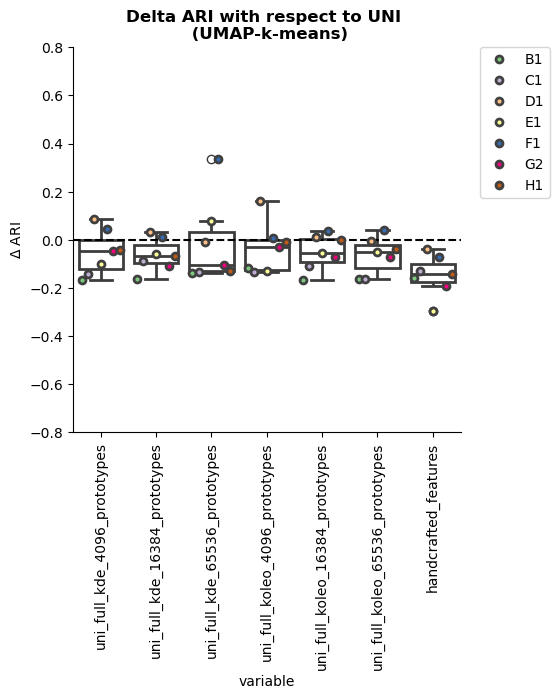

In [67]:
# plot delta ARI
plt.figure()
sns.boxplot(data=df_delta_ari, palette=models_palette, linewidth=2, showfliers=False)
plt.title(f'Delta ARI with respect to UNI \n (UMAP-k-means)', weight='bold')
plt.ylabel(r'$\Delta$ ARI')
sns.despine()
plt.xticks(rotation=90)
plt.axhline(0, color='black', linestyle='--')
plt.savefig(os.path.join(config["figures_folder"], f"Figure2/delta_umap_ari_scores_boxplot_{model_type}_models_colors.pdf"), bbox_inches='tight')
plt.ylim(-0.8, 0.8)

plt.figure()
sns.boxplot(data=df_delta_ari, color='white', linewidth=2)

# sns.stripplot(data=df_delta_ari.reset_index(), palette='Accent', hue='index')
df_long = df_delta_ari.reset_index().melt(id_vars=['patient'], var_name='variable', value_name='value')

# Create the strip plot
sns.stripplot(data=df_long, x='variable', y='value', jitter=True, dodge=True, linewidth=2, palette='Accent', hue='patient')
plt.title(f'Delta ARI with respect to UNI \n (UMAP-k-means)', weight='bold')
plt.ylabel(r'$\Delta$ ARI')
sns.despine()
plt.xticks(rotation=90)
plt.axhline(0, color='black', linestyle='--')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig(os.path.join(config["figures_folder"], f"Figure3/delta_umap_ari_scores_boxplot_{model_type}_models_with_patient.pdf"), bbox_inches='tight')

if df_long['patient'].nunique() > 15:
    plt.legend().remove()
else:
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    
plt.ylim(-0.8, 0.8)

In [68]:
## Correlation with shannon entropy
import json 

with open(os.path.join(benchmark_folder, "shannon_entropy", "shannon_entropy_all_comps_raw.json")) as f:
    shannon_entropy = json.load(f)

In [69]:
os.path.join(benchmark_folder, "shannon_entropy", "shannon_entropy_all_comps_raw.json")

'../../results/HER2/benchmark/uni_full_models/shannon_entropy/shannon_entropy_all_comps_raw.json'

In [70]:
df_shannon = pd.DataFrame.from_dict(shannon_entropy, orient='index', columns=['shannon_entropy'])


In [71]:
df_shannon.rename(index={'handcrafted': 'handcrafted_features'}, inplace=True)

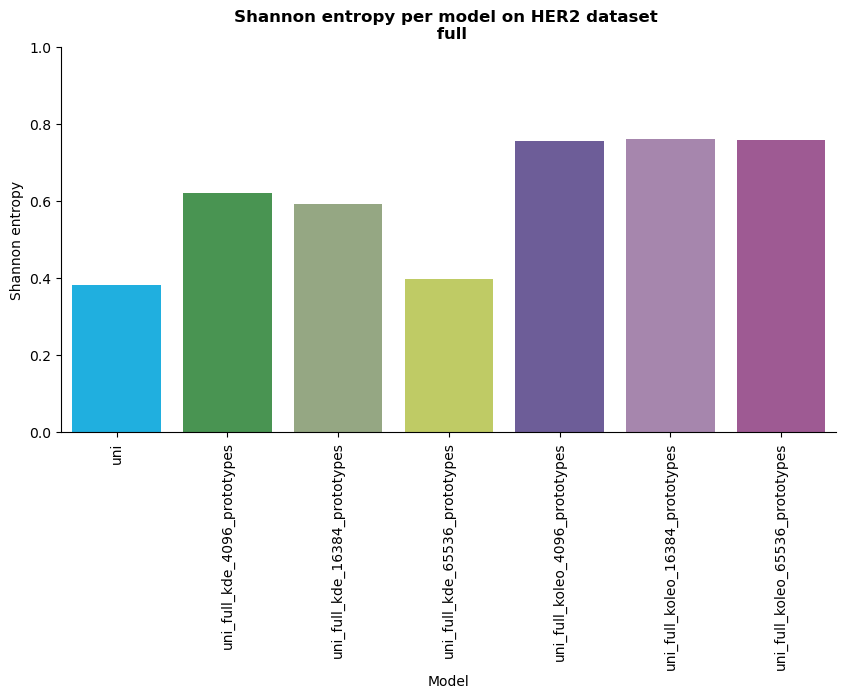

In [72]:
# df_shannon.sort_values('shannon_entropy', inplace=True, ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(data=df_shannon, 
            x=df_shannon.index, 
            y='shannon_entropy', 
            hue=df_shannon.index, palette=models_palette)
sns.despine()
plt.xlabel("Model")
plt.ylabel("Shannon entropy")
plt.title(f"Shannon entropy per model on {config['dataset']} dataset \n {model_type}", weight='bold')
plt.xticks(rotation=90)
plt.ylim(0,1)
plt.savefig(os.path.join(config["figures_folder"], f"Figure2/shannon_entropy_per_model_{model_type}.pdf"), bbox_inches='tight')

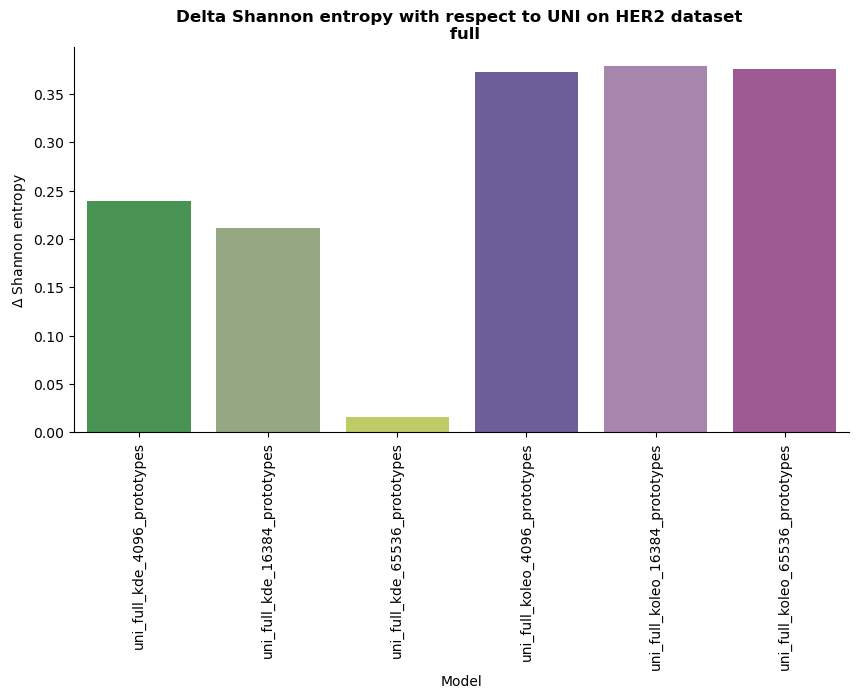

In [73]:
df_shannon_delta = df_shannon.copy()
df_shannon_delta = df_shannon_delta - df_shannon.loc['uni']
df_shannon_delta.drop('uni', inplace=True)

plt.figure(figsize=(10, 5))
sns.barplot(data=df_shannon_delta, 
            x=df_shannon_delta.index, 
            y='shannon_entropy', 
            hue=df_shannon_delta.index, palette=models_palette)
sns.despine()
plt.xlabel("Model")
plt.ylabel(r"$\Delta$ Shannon entropy")
plt.title(f"Delta Shannon entropy with respect to UNI on {config['dataset']} dataset \n {model_type}", weight='bold')
plt.xticks(rotation=90)
plt.savefig(os.path.join(config["figures_folder"], f"Figure3/delta_shannon_entropy_per_model_{model_type}_barplot.pdf"), bbox_inches='tight')





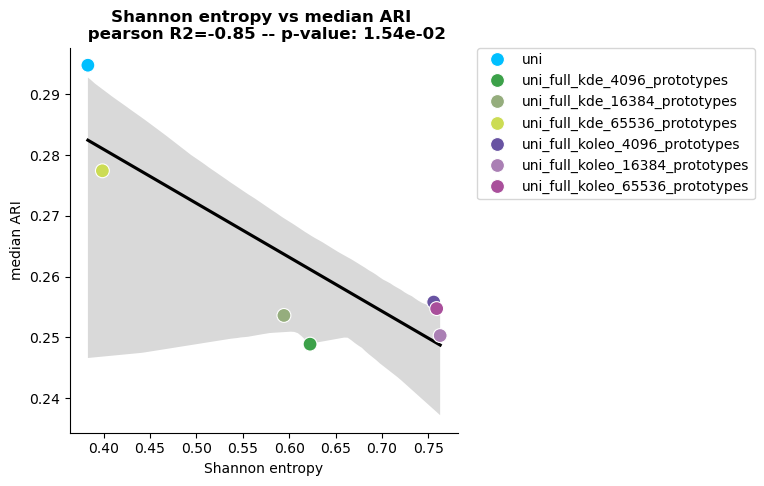

In [74]:
from scipy.stats import spearmanr, pearsonr

df_shannon = pd.DataFrame.from_dict(shannon_entropy, orient='index', columns=['shannon_entropy'])

median_ari_per_model = df_comp[df_comp['clustering'] == 'umap'][['model', 'ari']].groupby('model').median()
median_ari_per_model.columns = ['median_ari']

df_model_summary = df_shannon.merge(median_ari_per_model, left_index=True, right_index=True)

# df_model_summary = df_model_summary.drop(["uni_full_4096_prototypes"])

s, p = pearsonr(df_model_summary['shannon_entropy'], df_model_summary['median_ari'])
plt.figure(figsize=(5, 5))
sns.regplot(data=df_model_summary, x='shannon_entropy', y='median_ari', color='black')
sns.scatterplot(data=df_model_summary, x='shannon_entropy', y='median_ari', hue=df_model_summary.index,
                palette=models_palette, zorder=2, s=100)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Shannon entropy')
plt.ylabel('median ARI')
plt.title(f'Shannon entropy vs median ARI \n pearson R2={s:.2f} -- p-value: {p:.2e}', weight='bold')
sns.despine()
plt.savefig(os.path.join(config["figures_folder"], f"Figure2/shannon_entropy_vs_median_ari_{model_type}_models.pdf"), bbox_inches='tight')

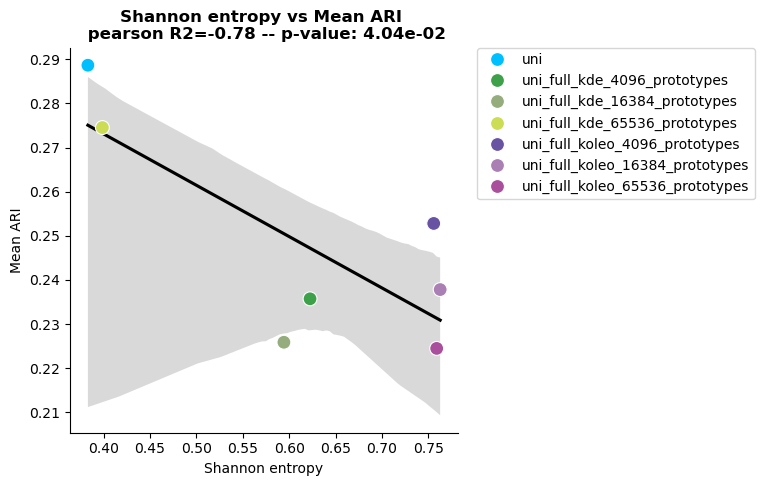

In [75]:

df_shannon = pd.DataFrame.from_dict(shannon_entropy, orient='index', columns=['shannon_entropy'])

mean_ari_per_model = df_comp[df_comp['clustering'] == 'umap'][['model', 'ari']].groupby('model').mean()
mean_ari_per_model.columns = ['mean_ari']

df_model_summary = df_shannon.merge(mean_ari_per_model, left_index=True, right_index=True)

# df_model_summary = df_model_summary.drop(["uni_full_4096_prototypes"])

s, p = pearsonr(df_model_summary['shannon_entropy'], df_model_summary['mean_ari'])
plt.figure(figsize=(5, 5))
sns.regplot(data=df_model_summary, x='shannon_entropy', y='mean_ari', color='black')
sns.scatterplot(data=df_model_summary, x='shannon_entropy', y='mean_ari', hue=df_model_summary.index,
                palette=models_palette, zorder=2, s=100)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Shannon entropy')
plt.ylabel('Mean ARI')
plt.title(f'Shannon entropy vs Mean ARI \n pearson R2={s:.2f} -- p-value: {p:.2e}', weight='bold')
sns.despine()
plt.savefig(os.path.join(config["figures_folder"], f"Figure3/shannon_entropy_vs_mean_ari_{model_type}_models.pdf"), bbox_inches='tight')

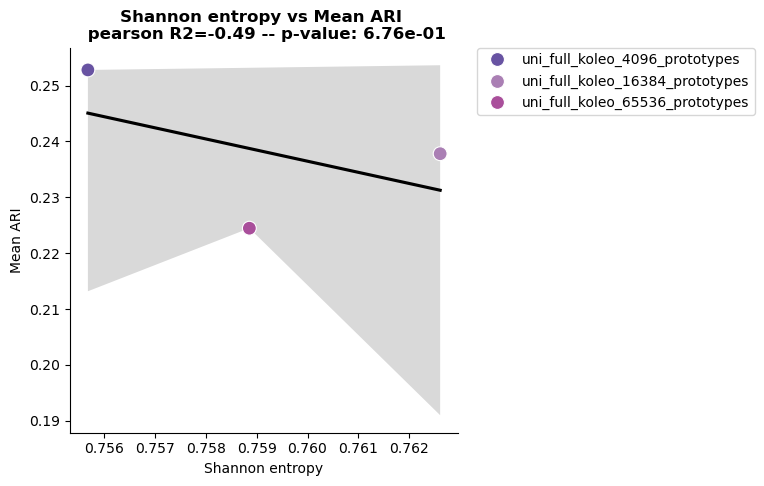

In [76]:

s, p = pearsonr(df_model_summary.loc[[idx for idx in df_model_summary.index if "koleo" in idx]]
['shannon_entropy'], df_model_summary.loc[[idx for idx in df_model_summary.index if "koleo" in idx]]
['mean_ari'])
plt.figure(figsize=(5, 5))
sns.regplot(data=df_model_summary.loc[[idx for idx in df_model_summary.index if "koleo" in idx]]
, x='shannon_entropy', y='mean_ari', color='black')
sns.scatterplot(data=df_model_summary.loc[[idx for idx in df_model_summary.index if "koleo" in idx]]
, x='shannon_entropy', y='mean_ari', hue=df_model_summary.loc[[idx for idx in df_model_summary.index if "koleo" in idx]]
.index,
                palette=models_palette, zorder=2, s=100)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Shannon entropy')
plt.ylabel('Mean ARI')
plt.title(f'Shannon entropy vs Mean ARI \n pearson R2={s:.2f} -- p-value: {p:.2e}', weight='bold')
sns.despine()
plt.savefig(os.path.join(config["figures_folder"], f"Figure3/shannon_entropy_vs_mean_ari_{model_type}_models.pdf"), bbox_inches='tight')

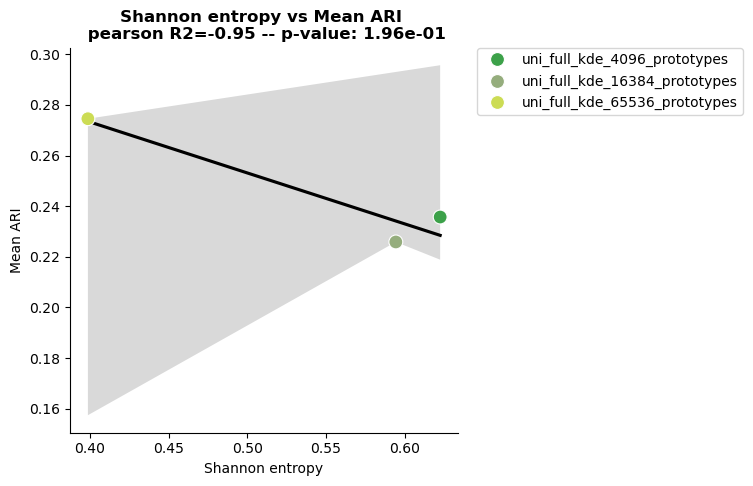

In [77]:

s, p = pearsonr(df_model_summary.loc[[idx for idx in df_model_summary.index if "kde" in idx]]
['shannon_entropy'], df_model_summary.loc[[idx for idx in df_model_summary.index if "kde" in idx]]
['mean_ari'])
plt.figure(figsize=(5, 5))
sns.regplot(data=df_model_summary.loc[[idx for idx in df_model_summary.index if "kde" in idx]]
, x='shannon_entropy', y='mean_ari', color='black')
sns.scatterplot(data=df_model_summary.loc[[idx for idx in df_model_summary.index if "kde" in idx]]
, x='shannon_entropy', y='mean_ari', hue=df_model_summary.loc[[idx for idx in df_model_summary.index if "kde" in idx]]
.index,
                palette=models_palette, zorder=2, s=100)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Shannon entropy')
plt.ylabel('Mean ARI')
plt.title(f'Shannon entropy vs Mean ARI \n pearson R2={s:.2f} -- p-value: {p:.2e}', weight='bold')
sns.despine()
plt.savefig(os.path.join(config["figures_folder"], f"Figure3/shannon_entropy_vs_mean_ari_{model_type}_models.pdf"), bbox_inches='tight')

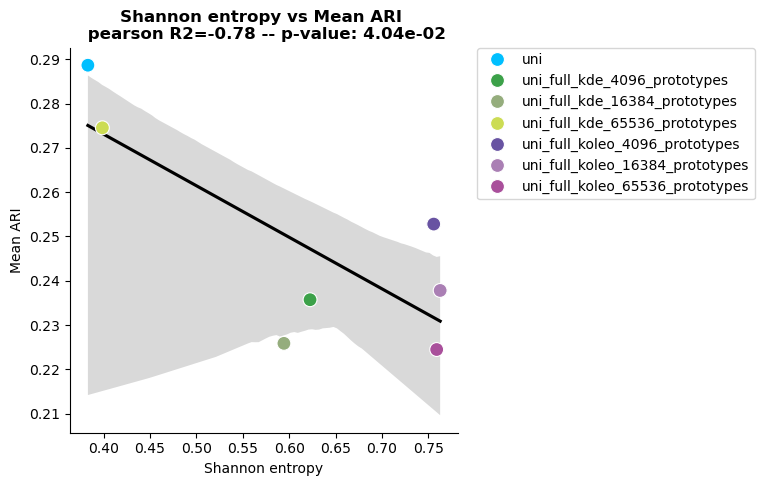

In [78]:

df_shannon = pd.DataFrame.from_dict(shannon_entropy, orient='index', columns=['shannon_entropy'])

mean_ari_per_model = df_comp[df_comp['clustering'] == 'umap'][['model', 'ari']].groupby('model').mean()
mean_ari_per_model.columns = ['mean_ari']

df_model_summary = df_shannon.merge(mean_ari_per_model, left_index=True, right_index=True)

# df_model_summary = df_model_summary.drop(["uni_full_4096_prototypes"])

s, p = pearsonr(df_model_summary['shannon_entropy'], df_model_summary['mean_ari'])
plt.figure(figsize=(5, 5))
sns.regplot(data=df_model_summary, x='shannon_entropy', y='mean_ari', color='black')
sns.scatterplot(data=df_model_summary, x='shannon_entropy', y='mean_ari', hue=df_model_summary.index,
                palette=models_palette, zorder=2, s=100)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Shannon entropy')
plt.ylabel('Mean ARI')
plt.title(f'Shannon entropy vs Mean ARI \n pearson R2={s:.2f} -- p-value: {p:.2e}', weight='bold')
sns.despine()
plt.savefig(os.path.join(config["figures_folder"], f"Figure3/shannon_entropy_vs_mean_ari_{model_type}_models.pdf"), bbox_inches='tight')

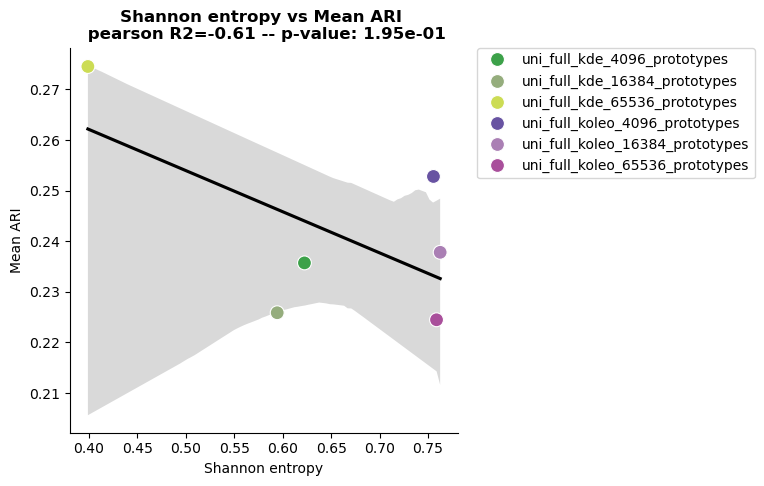

In [79]:


# df_model_summary = df_model_summary.drop(["uni_full_4096_prototypes"])

s, p = pearsonr(df_model_summary.drop("uni")['shannon_entropy'], df_model_summary.drop("uni")['mean_ari'])
plt.figure(figsize=(5, 5))
sns.regplot(data=df_model_summary.drop("uni"), x='shannon_entropy', y='mean_ari', color='black')
sns.scatterplot(data=df_model_summary.drop("uni"), x='shannon_entropy', y='mean_ari', hue=df_model_summary.drop("uni").index,
                palette=models_palette, zorder=2, s=100)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Shannon entropy')
plt.ylabel('Mean ARI')
plt.title(f'Shannon entropy vs Mean ARI \n pearson R2={s:.2f} -- p-value: {p:.2e}', weight='bold')
sns.despine()

In [80]:
try:
    with open(os.path.join(benchmark_folder, 'unsupervised_clustering_ARI', 'kmeans', "best_umap_ari_overall_annotated_only.json")) as f:
        overall_umap = json.load(f)
except:
    overall_umap = benchmark_clustering.get_best_UMAP_ari_overall()

overall_umap_aris = {}
for model in overall_umap.keys():
    overall_umap_aris[model] = overall_umap[model]['ari']

df_model_summary['overall_ari'] = pd.Series(overall_umap_aris)

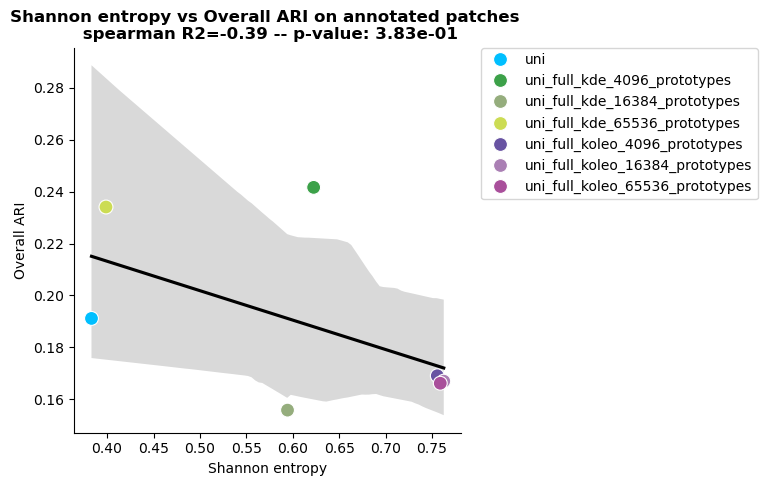

In [81]:
s, p = spearmanr(df_model_summary['shannon_entropy'], df_model_summary['overall_ari'])
plt.figure(figsize=(5, 5))
sns.regplot(data=df_model_summary, x='shannon_entropy', y='overall_ari', color='black')
sns.scatterplot(data=df_model_summary, x='shannon_entropy', y='overall_ari', hue=df_model_summary.index,
                palette=models_palette, s=100)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Shannon entropy')
plt.ylabel('Overall ARI')
plt.title(f'Shannon entropy vs Overall ARI on annotated patches \n spearman R2={s:.2f} -- p-value: {p:.2e}', weight='bold')
sns.despine()
plt.savefig(os.path.join(config["figures_folder"], f"Figure2/shannon_entropy_vs_overall_ari_{model_type}_models.pdf"), bbox_inches='tight')

In [82]:
# from scipy.stats import entropy
# from digitalhistopathology.benchmark.benchmark_base import BenchmarkBase

# benchmark_HER2 = BenchmarkBase(path_to_pipeline=[config['path_to_base_pipelines'][0]],
#                                         pipelines_list=[config['base_model_list'][0]],
#                                         dataset_name="her2_final_without_A",
#                                         saving_folder=config['base_benchmark_folder'])

# benchmark_HER2.compute_image_embeddings()

# proportions_invasive = {}
# entropy_slide = {}
# for slide in benchmark_HER2.image_embeddings['uni'].emb.obs['name_origin'].unique():
#     #if slide != 'C1':
#     value_counts = benchmark_HER2.image_embeddings['uni'].emb.obs[benchmark_HER2.image_embeddings['uni'].emb.obs['name_origin'] == slide]['label'].value_counts()
#     value_counts.drop('nan', inplace=True)
#     if value_counts.sum() == 0:
#         continue
#     proportion_invasive = value_counts['invasive cancer'] *100 / value_counts.sum()
#     proportions_invasive[slide] = proportion_invasive
#     entropy_slide[slide] = entropy(value_counts)
#     print(f"Slide: {slide}; proportion of invasive cancer: {proportion_invasive}; entropy: {entropy(value_counts)}")

# df = pd.DataFrame()
# for model, model_scores in umap_clust.items():
#     df[model] = [umap_clust[model][patient]['ari'] for patient in umap_clust[model].keys() if patient != 'all' and patient != 'mean']

# df.index = [patient for patient in umap_clust['uni'].keys() if patient != 'all' and patient != 'mean']

# plt.figure(figsize=(10, 25))
# for i, model in enumerate([model for model in model_list if model != "uni"]):
#     plt.subplot(len([model for model in model_list if model != "uni"]), 2, i*2+1)
#     s, p = spearmanr(df[model], list(proportions_invasive.values()))
#     sns.regplot(x=df[model], y=list(proportions_invasive.values()), color='black', x_ci="sd")
#     sns.scatterplot(x=df[model], y=proportions_invasive.values(), hue=df.index, palette='Accent', s=60)
#     plt.legend().remove()
#     plt.title(f"{model} \n Spearman R2: {s:.2f} -- p-value: {p:.2e}", weight='bold')
#     plt.xlabel('ARI')
#     plt.ylabel('Percentage of invasive cancer [%]')
#     sns.despine()

#     plt.subplot(len([model for model in model_list if model != "uni"]), 2, i*2+2)
#     s, p = spearmanr(df[model], list(entropy_slide.values()))
#     sns.regplot(x=df[model], y=list(entropy_slide.values()), color='black', x_ci='sd')
#     sns.scatterplot(x=df[model], y=entropy_slide.values(), hue=df.index, palette='Accent', s=60)
#     plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#     plt.title(f"{model} \n Spearman R2: {s:.2f} -- p-value: {p:.2e}", weight='bold')
#     plt.xlabel('ARI')
#     plt.ylabel('Entropy')
#     sns.despine()



# plt.tight_layout()
# plt.savefig(os.path.join(config['figures_folder'], f"Figure3/ari_per_patient_vs_slide_entropy_and_pct_cancer_{model_type}_models.pdf"), bbox_inches='tight')


In [83]:
benchmark_clustering_explora = BenchmarkClustering(path_to_pipeline=config['path_to_retrained_pipelines_1'],
                                           pipelines_list=config["retrained_model_list1"],
                                           results_folder="../results",
                                           saving_folder=os.path.join(config["retrained_benchmark_folder1"], "unsupervised_clustering_ARI", "kmeans"),
                                           dataset=config['dataset'],
                                           extension=extension
                                           )

benchmark_clustering_full = BenchmarkClustering(path_to_pipeline=config['path_to_retrained_pipelines_2'],
                                           pipelines_list=config["retrained_model_list2"],
                                           results_folder="../results",
                                           saving_folder=os.path.join(config["retrained_benchmark_folder2"], "unsupervised_clustering_ARI", "kmeans"),
                                           dataset=config['dataset'],
                                           extension=extension
                                           )

['uni', 'uni_explora_kde_4096_prototypes', 'uni_explora_kde_16384_prototypes', 'uni_explora_kde_65536_prototypes', 'uni_explora_koleo_4096_prototypes', 'uni_explora_koleo_16384_prototypes', 'uni_explora_koleo_65536_prototypes']
<class 'list'>
Creating folder ../../results/benchmark/her2_final_without_A/uni_explora_models/unsupervised_clustering_ARI/kmeans...
Label files: []
['uni', 'uni_full_kde_4096_prototypes', 'uni_full_kde_16384_prototypes', 'uni_full_kde_65536_prototypes', 'uni_full_koleo_4096_prototypes', 'uni_full_koleo_16384_prototypes', 'uni_full_koleo_65536_prototypes']
<class 'list'>
Label files: []


## Comparison between full and explora

Computing raw clustering for model uni, obsm None


KeyError: 'uni'

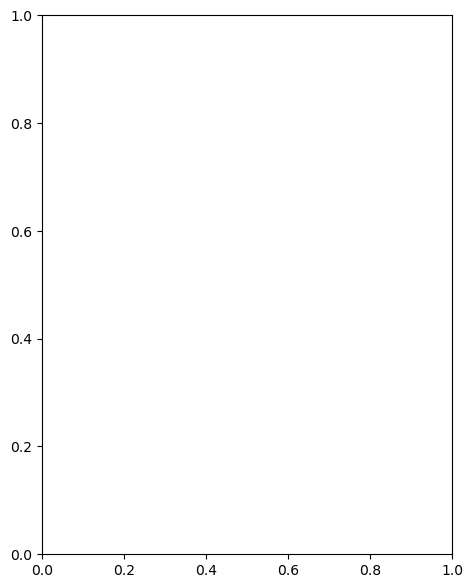

In [84]:
plt.figure(figsize=(18, 7))

##################### RAW #####################
plt.subplot(1,3,1)
try:
    with open(os.path.join(config['retrained_benchmark_folder2'], 'unsupervised_clustering_ARI', 'kmeans', 'unsupervised_clustering_results_optk.json')) as f:
        ari_overall_full = json.load(f)
except:
    ari_overall_full = benchmark_clustering_full.unsupervised_clustering_benchmark(clustering_name="raw")
    aris = {}
    for model in ari_overall_full.keys():
        aris[model] = ari_overall_full[model]['all']['ari']
        
    df_ari_full = pd.DataFrame(aris, index=['ari']).T
    df_ari_full['model_type'] = config['retrained_model_list2_type']

try:
    with open(os.path.join(config['retrained_benchmark_folder1'], 'unsupervised_clustering_ARI', 'kmeans', 'unsupervised_clustering_results_optk.json')) as f:
        ari_overall_explora= json.load(f)
except:
    ari_overall_explora = benchmark_clustering_explora.unsupervised_clustering_benchmark(n_clusters=None, clustering_name="raw")
        
    aris = {}
    for model in ari_overall_explora.keys():
        aris[model] = ari_overall_explora[model]['all']['ari']
        
    df_ari_explora = pd.DataFrame(aris, index=['ari']).T
    df_ari_explora['model_type'] = config['retrained_model_list1_type']

df = pd.concat([df_ari_explora, df_ari_full])
df["params"] = ["_".join(idx.split("_")[2:])  if "prototypes" in idx else idx for idx in df.index]
sns.barplot(data=df, x="params", y="ari", hue="model_type", palette=['lightgray', 'black'])
plt.xticks(rotation=90)

plt.title(f"ARI on all patches \n (raw-kmeans)", weight='bold')
sns.despine()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.tight_layout()
plt.ylim(0, 0.32)

###################### SVD #####################
plt.subplot(1,3,2)


try:
    with open(os.path.join(config['retrained_benchmark_folder2'], 'unsupervised_clustering_ARI', 'kmeans', 'svd5_multiplied_by_S_unsupervised_clustering_results_optk.json')) as f:
        ari_overall_full = json.load(f)
except:
    ari_overall_full = benchmark_clustering_full.unsupervised_clustering_benchmark(n_clusters=None, clustering_name="svd5")
    aris = {}
    for model in ari_overall_full.keys():
        aris[model] = ari_overall_full[model]['all']['ari']
        
    df_ari_full = pd.DataFrame(aris, index=['ari']).T
    df_ari_full['model_type'] = config['retrained_model_list2_type']

try:
    with open(os.path.join(config['retrained_benchmark_folder1'], 'unsupervised_clustering_ARI', 'kmeans', 'svd5_multiplied_by_S_unsupervised_clustering_results_optk.json')) as f:
        ari_overall_explora= json.load(f)
except:
    ari_overall_explora = benchmark_clustering_explora.unsupervised_clustering_benchmark(n_clusters=None, clustering_name="svd5")
    aris = {}
    for model in ari_overall_explora.keys():
        aris[model] = ari_overall_explora[model]['all']['ari']
        
    df_ari_explora = pd.DataFrame(aris, index=['ari']).T
    df_ari_explora['model_type'] = config['retrained_model_list1_type']

df = pd.concat([df_ari_explora, df_ari_full])
df["params"] = ["_".join(idx.split("_")[2:])  if "prototypes" in idx else idx for idx in df.index]
sns.barplot(data=df, x="params", y="ari", hue="model_type", palette=['lightgray', 'black'])
plt.xticks(rotation=90)

plt.title(f"ARI on all patches \n (svd5-kmeans)", weight='bold')
sns.despine()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.tight_layout()
plt.ylim(0, 0.32)

#################### UMAP #####################
plt.subplot(1,3,3)
try:
    with open(os.path.join(config['retrained_benchmark_folder2'], 'unsupervised_clustering_ARI', 'kmeans', 'best_umap_ari_overall.json')) as f:
        ari_overall_full = json.load(f)
except:
    ari_overall_full = benchmark_clustering_full.get_best_UMAP_ari_overall()

df_ari_overall_full = pd.DataFrame(ari_overall_full).T[['ari']]
df_ari_overall_full['model_type'] = config['retrained_model_list2_type']
df_ari_overall_full['dataset'] = df_ari_overall_full.index

try:
    with open(os.path.join(config['retrained_benchmark_folder1'], 'unsupervised_clustering_ARI', 'kmeans', 'best_umap_ari_overall.json')) as f:
        ari_overall_explora= json.load(f)
except:
    ari_overall_explora = benchmark_clustering_explora.get_best_UMAP_ari_overall()

df_ari_overall_explora = pd.DataFrame(ari_overall_explora).T[['ari']]
df_ari_overall_explora['model_type'] = config['retrained_model_list1_type']
df_ari_overall_explora['dataset'] = df_ari_overall_explora.index



df = pd.concat([df_ari_overall_explora, df_ari_overall_full])
df["params"] = ["_".join(idx.split("_")[2:])  if "prototypes" in idx else idx for idx in df.index]
sns.barplot(data=df, x="params", y="ari", hue="model_type", palette=['lightgray', 'black'])
plt.xticks(rotation=90)

plt.title(f"ARI on all patches \n (UMAP-kmeans)", weight='bold')
sns.despine()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.tight_layout()
plt.ylim(0, 0.5)

plt.savefig(os.path.join(config["figures_folder"], "Figure2/ARI_scores_all_patches_full_vs_explora_models_raw_svd5_umap.pdf"), bbox_inches='tight')

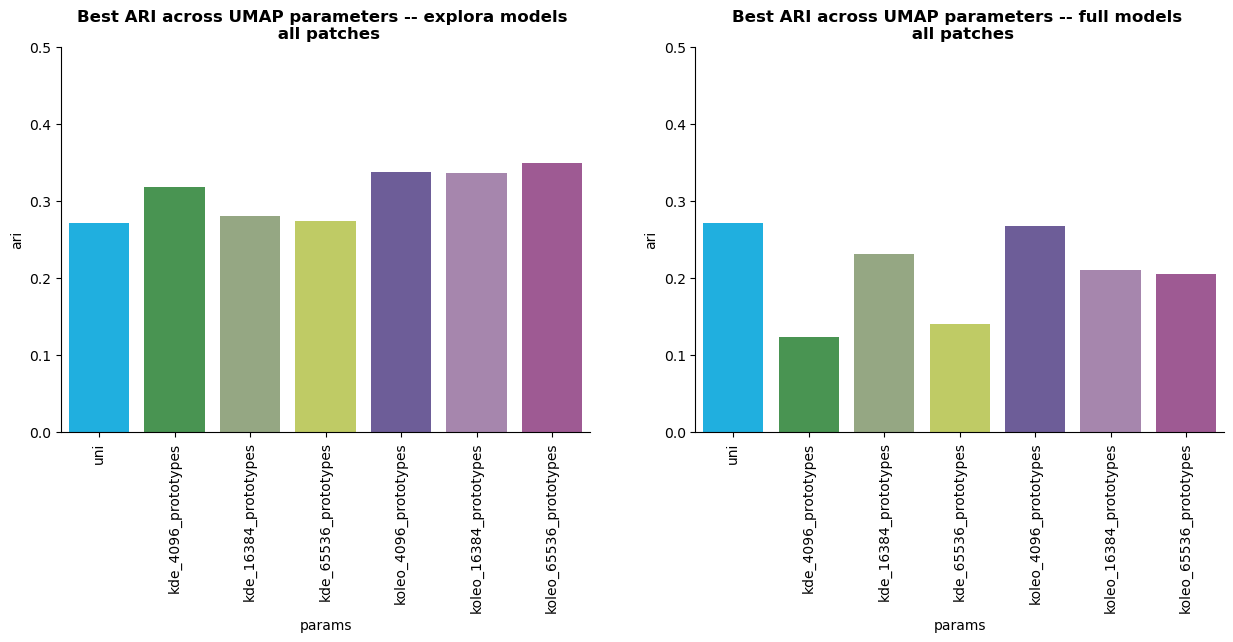

In [ ]:
plt.figure(figsize=(15, 5), )

plt.subplot(1, 2, 1)
sns.barplot(data=df[df['model_type'] == config['retrained_model_list1_type']], x="params", y="ari", hue="params", palette=a+['lightgrey'])
plt.xticks(rotation=90)
plt.title(f"Best ARI across UMAP parameters -- {config['retrained_model_list1_type']} models \n all patches", weight='bold')
sns.despine()
plt.ylim(0, 0.5)

plt.subplot(1, 2, 2)
sns.barplot(data=df[df['model_type'] == config['retrained_model_list2_type']], x="params", y="ari", hue="params", palette=a+['lightgrey'])
plt.xticks(rotation=90)
plt.title(f"Best ARI across UMAP parameters -- {config['retrained_model_list2_type']} models \n all patches", weight='bold')
sns.despine()
plt.ylim(0, 0.5)
plt.savefig(os.path.join(config["figures_folder"], "Figure3/best_ari_across_umap_parameters_full_vs_explora_models.pdf"), bbox_inches='tight')

In [85]:
try:
    with open(os.path.join(config['retrained_benchmark_folder2'], 'unsupervised_clustering_ARI', 'kmeans', 'unsupervised_clustering_results_optk.json')) as f:
        ari_overall_full = json.load(f)
except:
    ari_overall_full = benchmark_clustering_full.unsupervised_clustering_benchmark(clustering_name='raw', n_clusters=None)

    aris = {}
    for model in ari_overall_full.keys():
        aris[model] = ari_overall_full[model]['all']['ari']
        
    df_ari_full = pd.DataFrame(aris, index=['ari']).T
    df_ari_full['model_type'] = config['retrained_model_list2_type']

try:
    with open(os.path.join(config['retrained_benchmark_folder1'], 'unsupervised_clustering_ARI', 'kmeans', 'unsupervised_clustering_results_optk.json')) as f:
        ari_overall_explora = json.load(f)
    
except:
    ari_overall_explora = benchmark_clustering_explora.unsupervised_clustering_benchmark(clustering_name='raw', n_clusters=None)

    aris = {}
    for model in ari_overall_explora.keys():
        aris[model] = ari_overall_explora[model]['all']['ari']
        
    df_ari_explora = pd.DataFrame(aris, index=['ari']).T
    df_ari_explora['model_type'] = config['retrained_model_list1_type']

df = pd.concat([df_ari_explora, df_ari_full])
df["params"] = ["_".join(idx.split("_")[2:])  if "prototypes" in idx else idx for idx in df.index]

Computing raw clustering for model uni, obsm None


KeyError: 'uni'

Computing raw clustering for model uni, obsm None


KeyError: 'uni'

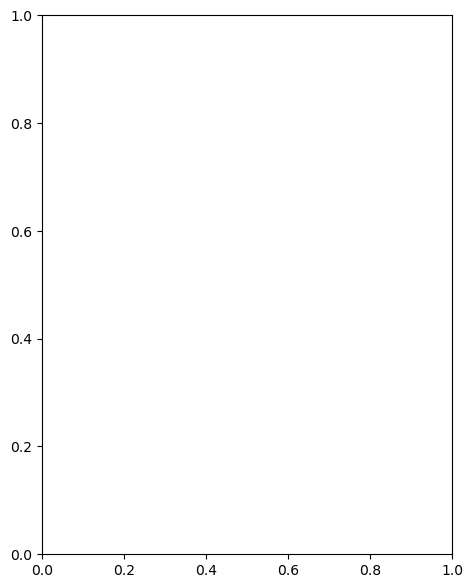

In [86]:
plt.figure(figsize=(18, 7))

##################### RAW #####################
plt.subplot(1,3,1)

try:
    with open(os.path.join(config['retrained_benchmark_folder2'], 'unsupervised_clustering_ARI', 'kmeans', 'unsupervised_clustering_results_optk.json')) as f:
        ari_overall_full = json.load(f)
except:
    ari_overall_full = benchmark_clustering_full.unsupervised_clustering_benchmark(clustering_name='raw', n_clusters=None)

    aris = {}
    for model in ari_overall_full.keys():
        aris[model] = ari_overall_full[model]['all']['ari']
        
    df_ari_full_delta = pd.DataFrame(aris, index=['ari']).T
    df_ari_full_delta['model_type'] = config['retrained_model_list2_type']
    df_ari_full_delta['ari'] = df_ari_full_delta['ari'] - df_ari_full.loc['uni', 'ari']

try:
    with open(os.path.join(config['retrained_benchmark_folder1'], 'unsupervised_clustering_ARI', 'kmeans', 'unsupervised_clustering_results_optk.json')) as f:
        ari_overall_explora= json.load(f)
except:
    ari_overall_explora = benchmark_clustering_explora.unsupervised_clustering_benchmark(clustering_name='raw', n_clusters=None)
    
    aris = {}
    for model in ari_overall_explora.keys():
        aris[model] = ari_overall_explora[model]['all']['ari']
        
    df_ari_explora_delta = pd.DataFrame(aris, index=['ari']).T
    df_ari_explora_delta['model_type'] = config['retrained_model_list1_type']
    df_ari_explora_delta['ari'] = df_ari_explora_delta['ari'] - df_ari_explora.loc['uni', 'ari']

df = pd.concat([df_ari_explora_delta, df_ari_full_delta])
df["params"] = ["_".join(idx.split("_")[2:])  if "prototypes" in idx else idx for idx in df.index]
sns.barplot(data=df, x="params", y="ari", hue="model_type", palette=['lightgray', 'black'])
plt.xticks(rotation=90)

plt.title(f"ARI on all patches \n (raw-kmeans)", weight='bold')
sns.despine()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.tight_layout()
plt.ylim(-0.15, 0.15)

###################### SVD #####################
plt.subplot(1,3,2)

try:
    with open(os.path.join(config['retrained_benchmark_folder2'], 'unsupervised_clustering_ARI', 'kmeans', 'svd5_multiplied_by_S_unsupervised_clustering_results_optk.json')) as f:
        ari_overall_full = json.load(f)
except:
    ari_overall_full = benchmark_clustering_full.unsupervised_clustering_benchmark(n_clusters=None, clustering_name="svd5")

    aris = {}
    for model in ari_overall_full.keys():
        aris[model] = ari_overall_full[model]['all']['ari']
        
    df_ari_full_delta = pd.DataFrame(aris, index=['ari']).T
    df_ari_full_delta['model_type'] = config['retrained_model_list2_type']
    df_ari_full_delta['ari'] = df_ari_full_delta['ari'] - df_ari_full.loc['uni', 'ari']

try:
    with open(os.path.join(config['retrained_benchmark_folder1'], 'unsupervised_clustering_ARI', 'kmeans', 'svd5_multiplied_by_S_unsupervised_clustering_results_optk.json')) as f:
        ari_overall_explora= json.load(f)
except:
    ari_overall_explora = benchmark_clustering_explora.unsupervised_clustering_benchmark(n_clusters=None, clustering_name="svd5")
    
    aris = {}
    for model in ari_overall_explora.keys():
        aris[model] = ari_overall_explora[model]['all']['ari']
        
    df_ari_explora_delta = pd.DataFrame(aris, index=['ari']).T
    df_ari_explora_delta['model_type'] = config['retrained_model_list1_type']
    df_ari_explora_delta['ari'] = df_ari_explora_delta['ari'] - df_ari_explora.loc['uni', 'ari']


df = pd.concat([df_ari_explora_delta, df_ari_full_delta])
df["params"] = ["_".join(idx.split("_")[2:])  if "prototypes" in idx else idx for idx in df.index]
sns.barplot(data=df, x="params", y="ari", hue="model_type", palette=['lightgray', 'black'])
plt.xticks(rotation=90)

plt.title(f"ARI on all patches \n (svd5-kmeans)", weight='bold')
sns.despine()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.tight_layout()
plt.ylim(-0.15, 0.15)

#################### UMAP #####################
plt.subplot(1,3,3)

try:
    with open(os.path.join(config['retrained_benchmark_folder2'], 'unsupervised_clustering_ARI',  'kmeans', 'best_umap_ari_overall.json')) as f:
        ari_overall_full = json.load(f)
except:
    ari_overall_full = benchmark_clustering_full.get_best_UMAP_ari_overall()

df_ari_overall_full_delta = pd.DataFrame(ari_overall_full).T[['ari']]
df_ari_overall_full_delta['model_type'] = config['retrained_model_list2_type']
df_ari_overall_full_delta['dataset'] = df_ari_overall_full_delta.index    
df_ari_overall_full_delta['ari'] = df_ari_overall_full_delta['ari'] - df_ari_overall_full_delta.loc['uni', 'ari']

try:
    
    with open(os.path.join(config['retrained_benchmark_folder1'], 'unsupervised_clustering_ARI','kmeans', 'best_umap_ari_overall.json')) as f:
        ari_overall_explora= json.load(f)
except:
    ari_overall_explora = benchmark_clustering_explora.get_best_UMAP_ari_overall()
    
df_ari_overall_explora_delta = pd.DataFrame(ari_overall_explora).T[['ari']]
df_ari_overall_explora_delta['model_type'] = config['retrained_model_list1_type']
df_ari_overall_explora_delta['dataset'] = df_ari_overall_explora_delta.index
df_ari_overall_explora_delta['ari'] = df_ari_overall_explora_delta['ari'] - df_ari_overall_explora_delta.loc['uni', 'ari']


df = pd.concat([df_ari_overall_explora_delta, df_ari_overall_full_delta])
df["params"] = ["_".join(idx.split("_")[2:])  if "prototypes" in idx else idx for idx in df.index]
sns.barplot(data=df, x="params", y="ari", hue="model_type", palette=['lightgray', 'black'])
plt.xticks(rotation=90)

plt.title(f"ARI on all patches \n (UMAP-kmeans)", weight='bold')
sns.despine()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.tight_layout()
plt.ylim(-0.15, 0.15)

plt.savefig(os.path.join(config["figures_folder"], "Figure2/delta_ARI_scores_all_patches_full_vs_explora_models_raw_svd5_umap.pdf"), bbox_inches='tight')

In [87]:
try:
    with open(os.path.join(config['retrained_benchmark_folder2'], "unsupervised_clustering_ARI", 'kmeans', "ARI_patient.json")) as f:
        patient_ari_full = json.load(f)
except:
    patient_ari_full = benchmark_clustering_full.compute_umap_ARI_patient_for_batch_control()

df_full = pd.DataFrame(patient_ari_full, index=['batch_ari']).T
df_full['model'] = config['retrained_model_list2_type']
    
try:
    with open(os.path.join(config['retrained_benchmark_folder1'], "unsupervised_clustering_ARI", 'kmeans', "ARI_patient.json")) as f:
        patient_ari_explora = json.load(f)
except:
    patient_ari_explora = benchmark_clustering_explora.compute_umap_ARI_patient_for_batch_control()

df_explora = pd.DataFrame(patient_ari_explora, index=['batch_ari']).T    
df_explora['model'] = config['retrained_model_list1_type']

df_batch = pd.concat([df_full, df_explora])
df_batch["params"] = ["_".join(idx.split("_")[2:])  if "prototypes" in idx else idx for idx in df_batch.index]  





KeyError: 'uni'

In [88]:
sns.barplot(data=df_batch, x="params", y="batch_ari", hue="model", palette={config['retrained_model_list2_type']: 'black', config['retrained_model_list1_type']: 'lightgray'})
sns.despine()
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Batch effect (patient ARI)", weight='bold')
plt.savefig(os.path.join(config["figures_folder"], "Figure3/batch_effect_full_vs_explora_models.pdf"), bbox_inches='tight')

NameError: name 'df_batch' is not defined